<font size=8> F-I Figures


In [ ]:
import sys
import os
print(sys.path.append(os.getcwd()+ '/..'))

In [ ]:
#Common Python Packages
from pickle import TRUE
import sys
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + '/..')

#my imports
from adaptation_lib.spike_stats import *
from adaptation_lib.dynapse_setup import *
from adaptation_lib.graphing import *
from adaptation_lib.tc_extraction import *

# Determine the user's home difrom adaptation_lib import pc_single,ff
home_directory = os.path.expanduser("~")
# Path to the Documents directory
documents_path = os.path.join(home_directory, "Documents")
# Path to the dynapse-se2-data directory within Documents
save_directory_path = os.path.join(documents_path, "dynapse-se2-data")
# Path to the data
data_type_path = os.path.join(save_directory_path, "FF")
# Path to save figures
figure_path = os.path.join(save_directory_path, "Figures")

<font size=6> LOAD 
DATA


In [ ]:
# Load your data
neuron_config=neuron_configs_bio.config()
FF_output = np.load(data_type_path+'/FF_output_1.npy', allow_pickle=True)
[FF_in, FF_out_PC, FF_out_PV, FF_out_SST, FF_cv] = FF_output

<font size=6> Font Sizes


In [ ]:
FONT_SIZE=15
TITLE_SIZE=20
LABEL_SIZE=15

<font size=6>Data Processing


In [8]:

window=len(FF_in)
means_PC = np.mean(FF_out_PC, axis=0)[:window]
stds_PC = np.std(FF_out_PC, axis=0)[:window]
means_PV = np.mean(FF_out_PV, axis=0)[:window]
stds_PV = np.std(FF_out_PV, axis=0)[:window]
means_SST = np.mean(FF_out_SST, axis=0)[:window]
stds_SST = np.std(FF_out_SST, axis=0)[:window]
FF_in = FF_in[:window]

# Normalize FF_in with your desired max_value (e.g., 200/250)
normalized_FF_in = normalize_input(FF_in, max_value=1)

# Calculate the fitted values
fit_PC = custom_relu((normalized_FF_in),.06,124,60) #threshold, gain, maximum firing rate
fit_PV = custom_relu((normalized_FF_in),.36,334,160)
fit_SST = custom_relu((normalized_FF_in),.18,198,90)

# Compute residuals
residuals_PC = means_PC - fit_PC
residuals_PV = means_PV - fit_PV
residuals_SST = means_SST - fit_SST

# Calculate root-mean-square error rounded to 2 decimal places

rmse_PC = np.sqrt(np.mean(residuals_PC**2))
rmse_PV = np.sqrt(np.mean(residuals_PV**2))
rmse_SST = np.sqrt(np.mean(residuals_SST**2))

# Data
data = [
    (means_PC, stds_PC, fit_PC, rmse_PC, 'cornflowerblue', 'b-.'),
    (means_PV, stds_PV, fit_PV, rmse_PV, 'coral', 'r-.'),
    (means_SST, stds_SST, fit_SST, rmse_SST, '#FFA500',  'C1-.')
]

labels = ["Pyramidal", "Parvalbumin", "Somatostatin"]


In [6]:
FONT_SIZE=15
TITLE_SIZE=20
LABEL_SIZE=15

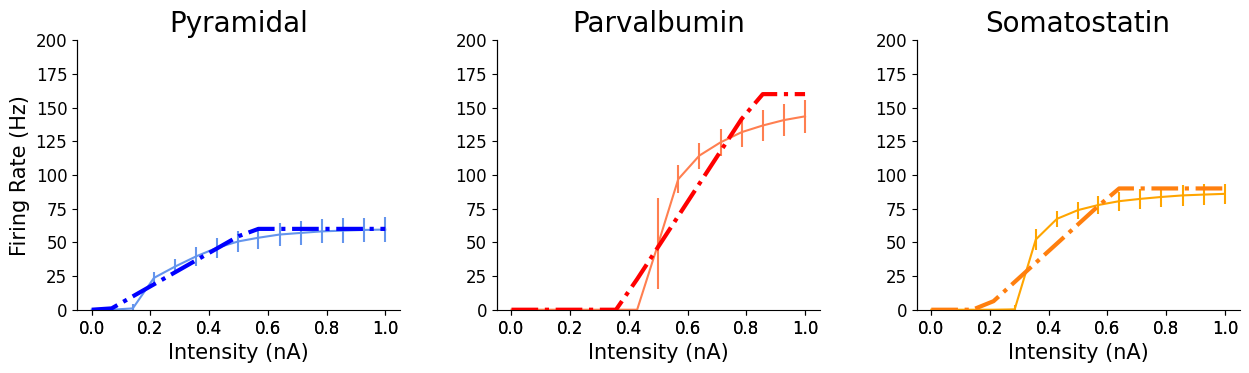

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3.5))

for i, ax in enumerate(axs):
    means, stds, fit, rmse, color, fit_color = data[i]
    label = labels[i]

    # Plot with error bars vs input DC parameter
    ax.errorbar(normalized_FF_in, means, yerr=stds, c=color, label=f'{label} dynapse')

    ax.set_title(f'{label}', fontsize=TITLE_SIZE)
    ax.set_xlabel(f'Intensity (nA)', fontsize=LABEL_SIZE)

    # Plot the fitted curves
    ax2 = ax.twiny()
    ax2.plot(normalized_FF_in, fit, fit_color, label=f'{label} bio fit', linewidth=3)
    ax2.set_ylim(0, 200)

    # Offset the twin axis below the host
    ax2.spines["bottom"].set_visible(False)

    # Remove right and top borders
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    #ax2.set_xlabel('Input Pulse normalized')

    # Move twinned axis ticks and label from top to bottom
    ax2.xaxis.set_ticks_position("bottom")
    ax2.xaxis.set_label_position("bottom")
    #set tick sizes
    ax.tick_params(labelsize=LABEL_SIZE-3)
    ax2.tick_params(labelsize=LABEL_SIZE-3)

axs[0].set_ylabel('Firing Rate (Hz)', fontsize=LABEL_SIZE)
plt.subplots_adjust(wspace=0.3)  # Adjust the width space as needed

# Create input annotation with rmse errors rounded to two decimal places
# fig.text(0.08, 0.5, 'Firing Rate (Hz)', va='center', rotation='vertical', fontsize=font_size)

plt.savefig(figure_path + '/fi_curves_combined.pdf', format='pdf', dpi=300)

#plt.tight_layout()
plt.show()

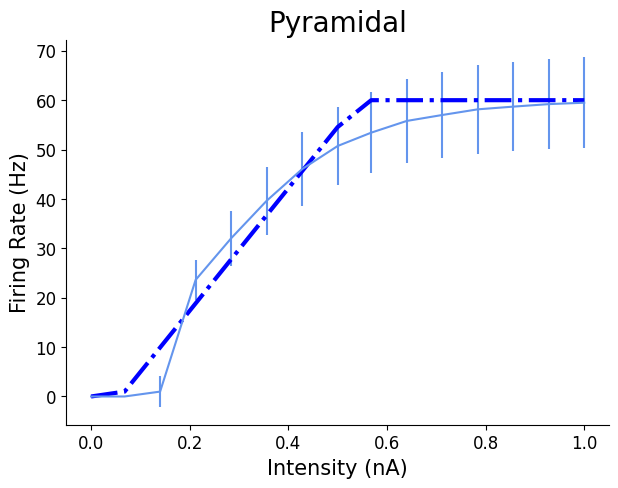

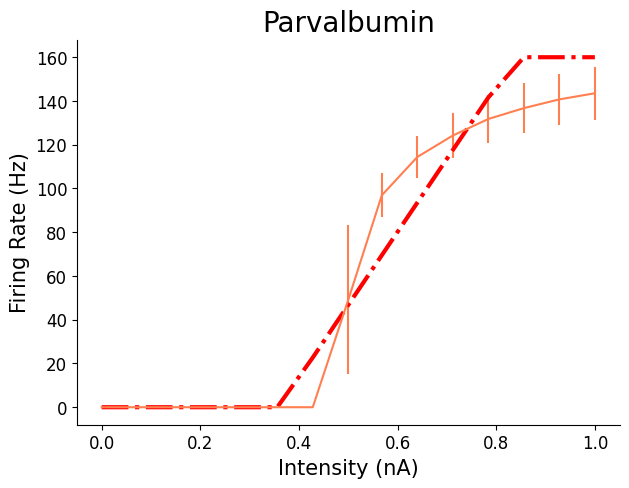

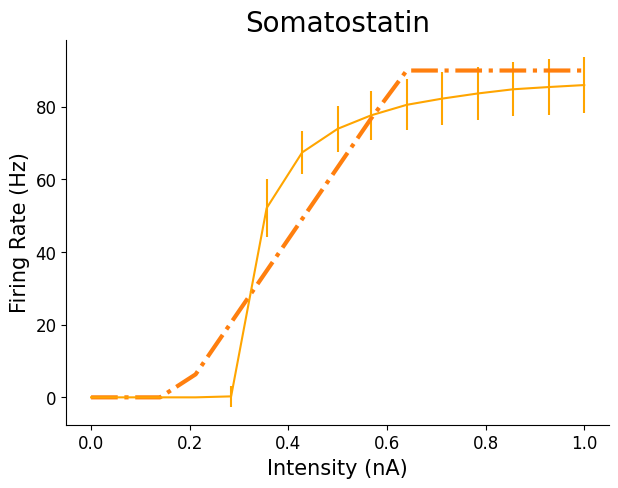

In [12]:
for i in range(3):
    means, stds, fit, rmse, color, fit_color = data[i]
    label = labels[i]

    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    ax.errorbar(normalized_FF_in, means, yerr=stds, c=color, label=f'{label} dynapse')
    ax.plot(normalized_FF_in, fit, fit_color, label=f'{label} bio fit', linewidth=3)
    ax.set_title(f'{label}', fontsize=TITLE_SIZE)
    ax.set_xlabel('Intensity (nA)', fontsize=LABEL_SIZE)
    ax.set_ylabel('Firing Rate (Hz)', fontsize=LABEL_SIZE)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelsize=LABEL_SIZE-3)
    plt.savefig(figure_path + f'/fi_curve_{label}.pdf', format='pdf', dpi=300)
    plt.show()
    plt.close()

    
    

    

ANOVA OF DATA

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Load the numpy file
data_path = 'f_i_data.npy'  # Update the path if the file is in a different directory
data = np.load(data_path, allow_pickle=True)

# Extract the data for each group
data_item = data.item()
data_pc = np.array(data_item['FF_out_PC'])
data_pv = np.array(data_item['FF_out_PV'])
data_sst = np.array(data_item['FF_out_SST'])

# Perform One-Way ANOVA for each of the 15 measurements across the three groups
anova_results = []

for i in range(15):
    # Extract the data for the i-th measurement across all samples
    sample_pc = data_pc[:, i]
    sample_pv = data_pv[:, i]
    sample_sst = data_sst[:, i]

    # Perform the ANOVA
    f_stat, p_value = stats.f_oneway(sample_pc, sample_pv, sample_sst)

    # Append the results
    anova_results.append({
        'Measurement': i + 1,  # Measurement number (starting from 1)
        'F-Statistic': f_stat,
        'p-Value': p_value
    })

# Create a DataFrame to hold the results and handle NaN values
anova_results_df = pd.DataFrame(anova_results).fillna('Not Computable')

# Display the results
print(anova_results_df)


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# Load the data
data_path = 'f_i_data.npy'
data = np.load(data_path, allow_pickle=True)

# Extract the data for each group
data_item = data.item()
data_pc = np.array(data_item['FF_out_PC'])
data_pv = np.array(data_item['FF_out_PV'])
data_sst = np.array(data_item['FF_out_SST'])

# Create a DataFrame with all the data
df_long = pd.DataFrame({
    'Subject': np.tile(np.repeat(np.arange(1, 251), 15), 3),  # 250 subjects, 15 measurements each, repeated for 3 groups
    'Group': np.repeat(['PC', 'PV', 'SST'], 250 * 15),
    'Measurement': np.tile(np.arange(1, 16), 250 * 3),
    'Value': np.concatenate([data_pc.flatten(), data_pv.flatten(), data_sst.flatten()])
})

# Perform the mixed two-way ANOVA
aovrm2way = AnovaRM(df_long, 'Value', 'Subject', within=['Measurement'], between='Group')
res2way = aovrm2way.fit()

print(res2way)


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the data
data = f_i_data

# Prepare the long-format DataFrame
intensities = np.array([0, 17, 35, 53, 71, 89, 107, 125, 142, 160, 178, 196, 214, 232, 250])
df_long = pd.DataFrame({
    'CellType': np.repeat(['PC', 'PV', 'SST'], repeats=250*15),
    'Intensity': np.tile(np.repeat(intensities, 250), 3),
    'Value': np.concatenate([data['FF_out_PC'].flatten(), data['FF_out_PV'].flatten(), data['FF_out_SST'].flatten()])
})

# Fit a mixed-effects model
model = smf.mixedlm("Value ~ C(CellType) * C(Intensity)", df_long, groups=df_long['CellType'])
result = model.fit()

# Print the summary of the model
print(result.summary())
